# Example: get an existing data set on which to train the model

## The Potsdam Scene Viewing Corpus
...is the data set we used. It can be downloaded from [this OSF directory](https://osf.io/n3byq/). It has the following structure:

- Subjects
    - first 35: Greyscale, with donut starting positions
    - second 35: Greyscale, with 5 possible staring locations
    - third 35: Color, with 5 possible staring locations
- Each subject saw 90 images plus 30 they saw a second time. There were two sessions of 60 images each.
- Images (in that order):
    - 15 left biased
    - 15 right biased
    - 15 bottom biased
    - 15 top biased
    - 15 center biased
    - 15 Patterns
    
The OSF repo all the relevant files:
- data range
- fixation locations
- images (zip file)

Download them to an accessible folder `corpus`.

In [1]:
import numpy as np
import pandas as pd

Load range file

In [13]:
dat_range = np.loadtxt('corpus/imrange_corpus.dat', skiprows=1, delimiter=' ')
x_range = dat_range[:, 0]
y_range = dat_range[:, 1]
d_range = {
    "x" : x_range,
    "y" : y_range
}


Load data file

In [12]:
df = pd.read_csv('corpus/PotsdamCorpusFixations.dat', sep=" ")
df.head()

,id,trial,image,nthpres,nth,nUntil,fd,fCroX,fCroY,xpos,ypos,idx,idy,sacamplitude,CBLikelihood,DGSal,DGDensity,EmpLikelihoodAll
15622,1,1,65,1,1,13,279,13.41,16.83,13.580,9.540,52,45,1.904186,0.000094,0.000113,0.000136,0.000176
15623,1,1,65,1,2,12,2249,13.41,16.83,17.085,13.155,67,64,2.152963,0.000160,0.000105,0.000145,0.000363
15624,1,1,65,1,3,11,1214,13.41,16.83,17.650,13.685,69,67,2.425618,0.000153,0.000108,0.000151,0.000315
15625,1,1,65,1,4,10,610,13.41,16.83,18.125,5.440,71,24,1.983129,0.000066,0.000028,0.000028,0.000062
15626,1,1,65,1,5,9,1245,13.41,16.83,17.020,9.635,66,46,1.365586,0.000102,0.000100,0.000122,0.000248


subset the data, get an example density map and visualize it

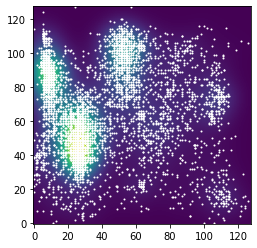

In [20]:
from scenewalk.scenewalk_model_object import scenewalk as scenewalk_model
from matplotlib import pyplot as plt

image = 1
df5 = df.loc[(df['image'] == image)]
img_x = np.asarray(df5.xpos)
img_y = np.asarray(df5.ypos)

sw = scenewalk_model("subtractive", "zero", "off", "off", "off", d_range)
img_x_t, img_y_t, fix_dens = sw.empirical_fixation_density(img_x, img_y)

plt.scatter(img_x_t, img_y_t, s=1, color='white')
plt.imshow(np.float64(fix_dens), origin='lower')
plt.show()



In [21]:
from PIL import Image
impath = "./corpus/PotsdamCorpusImages/0"+str(image)+".jpg"
jpgfile = Image.open(impath)

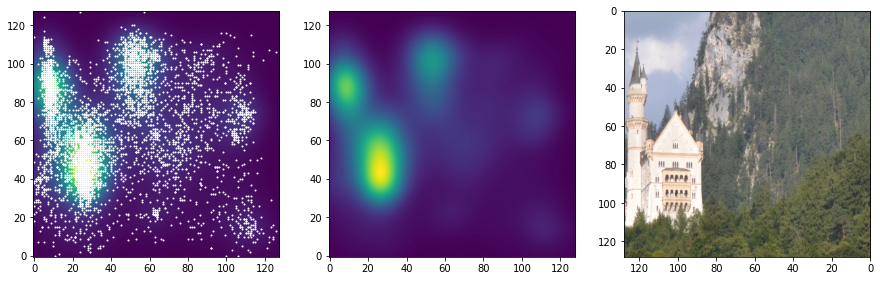

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
ax.ravel()
ax[0].scatter(img_x_t, img_y_t, s=1, color='white')
ax[0].imshow(np.float64(fix_dens), origin='lower')
ax[1].imshow(np.float64(fix_dens), origin='lower')
ax[2].imshow(jpgfile, extent=[128, 0, 128,0])

## Make density List
This will take a while...

In [29]:
# loop over all images
image_list = df["image"].unique()
# in the right order, so we can reference them by index
image_list.sort()
# model with right range is used to compute the density
sw = scenewalk_model("subtractive", "zero", "off", "off", "off", d_range)

density_list = []
for image in image_list:
    print("working on image number ", image)
    temp_df = df.loc[(df['image'] == image)]
    img_x = np.asarray(temp_df.xpos)
    img_y = np.asarray(temp_df.ypos)
    img_x_t, img_y_t, fix_dens = sw.empirical_fixation_density(img_x, img_y)
    density_list.append(fix_dens)
    temp_df = None

working on image number  1
working on image number  2
working on image number  3
working on image number  4
working on image number  5
working on image number  6
working on image number  7
working on image number  8
working on image number  9
working on image number  10
working on image number  11
working on image number  12
working on image number  13
working on image number  14
working on image number  15
working on image number  16
working on image number  17
working on image number  18
working on image number  19
working on image number  20
working on image number  21
working on image number  22
working on image number  23
working on image number  24
working on image number  25
working on image number  26
working on image number  27
working on image number  28
working on image number  29
working on image number  30
working on image number  31
working on image number  32
working on image number  33
working on image number  34
working on image number  35
working on image number  36
w

## Make datasets
We can subset the df frame to get training and test sets or to use only part of the data set for computation speed and pass it to the following "create_npys" function.

In [31]:
def create_npys(df):
    data_list_x = []
    data_list_y = []
    data_list_dur = []
    data_list_im = []
    subj_ids = np.unique(df['id']).astype('int')
    for sub in subj_ids:
        tr_list_x = []
        tr_list_y = []
        tr_list_dur = []
        tr_list_im = []
        sub_df = df[df['id']==sub]
        tr_ids = np.unique(sub_df['trial']).astype('int')
        for tr in tr_ids:
            tr_df = sub_df[sub_df['trial']==tr]
            print("Working on trial number", tr, "of", im_n, "for subject", sub)

            x_pos = np.asarray(tr_df['xpos'])
            y_pos = np.asarray(tr_df['ypos'])
            dur = np.asarray(tr_df['fd'].astype('int'))
            im = np.asarray(tr_df['image'].astype('int'))

            # durations in seconds
            dur = dur/1000

            tr_list_x.append(x_pos)
            tr_list_y.append(y_pos)
            tr_list_dur.append(dur)
            tr_list_im.append(im)

        data_list_x.append(np.asarray(tr_list_x))
        data_list_y.append(np.asarray(tr_list_y))
        data_list_dur.append(np.asarray(tr_list_dur))
        data_list_im.append(np.asarray(tr_list_im))
    return data_list_x, data_list_y, data_list_dur, data_list_im

This will take a long time... but at the end we should have a list in the required format.

In [32]:
data_list_x, data_list_y, data_list_dur, data_list_im = create_npys(df)

Working on trial number 1 of 90 for subject 1
Working on trial number 2 of 90 for subject 1
Working on trial number 3 of 90 for subject 1
Working on trial number 4 of 90 for subject 1
Working on trial number 5 of 90 for subject 1
Working on trial number 6 of 90 for subject 1
Working on trial number 7 of 90 for subject 1
Working on trial number 8 of 90 for subject 1
Working on trial number 9 of 90 for subject 1
Working on trial number 10 of 90 for subject 1
Working on trial number 11 of 90 for subject 1
Working on trial number 12 of 90 for subject 1
Working on trial number 13 of 90 for subject 1
Working on trial number 14 of 90 for subject 1
Working on trial number 15 of 90 for subject 1
Working on trial number 16 of 90 for subject 1
Working on trial number 17 of 90 for subject 1
Working on trial number 18 of 90 for subject 1
Working on trial number 19 of 90 for subject 1
Working on trial number 20 of 90 for subject 1
Working on trial number 21 of 90 for subject 1
Working on trial numbe

sanity check 1: are the lists all the same length

In [33]:
assert(len(data_list_x) == len(data_list_y))
assert(len(data_list_x) == len(data_list_dur))
assert(len(data_list_x) == len(data_list_im))

assert(len(data_list_x[3]) == len(data_list_y[3]))
assert(len(data_list_x[3]) == len(data_list_dur[3]))
assert(len(data_list_x[3]) == len(data_list_im[3]))
print("Looks Good")

Looks Good


sanity check 2: are they the right data type

In [34]:
from itertools import chain
flatx = list(chain.from_iterable(chain.from_iterable(data_list_x)))
flaty = list(chain.from_iterable(chain.from_iterable(data_list_y)))
flatdur = list(chain.from_iterable(chain.from_iterable(data_list_dur)))
flatim = list(chain.from_iterable(chain.from_iterable(data_list_im)))
assert all(isinstance(x, np.float64) for x in flatx)
assert all(isinstance(x, np.float64) for x in flaty)
assert all(isinstance(x, np.float64) for x in flatdur)
assert all(isinstance(x, np.int64) for x in flatim)
print("Looks good")

Looks good


In [21]:
np.save("./npy/corpus_x.npy", data_list_x)
np.save("./npy/corpus_y.npy", data_list_y)
np.save("./npy/corpus_dur.npy", data_list_dur)
np.save("./npy/corpus_im.npy", data_list_im)
np.save("./npy/corpus_densities.npy", densities_list)
np.save("./npy/corpus_range.npy", [x_range, y_range])

## Shorter Sets
... can be made by  subsetting the df dataframe. For example to only use trials on color images (here) or to make test and training sets. 

In [30]:
# Only the last 35 subjects
df_color_only = df[(df['id']>np.max(df['id'])-35) & (df['nthpres']<2)]
df_color_only.head()

,id,trial,image,nthpres,nth,nUntil,fd,fCroX,fCroY,xpos,ypos,idx,idy,sacamplitude,CBLikelihood,DGSal,DGDensity,EmpLikelihoodAll
119510,71,1,84,1,1,15,761,26.52,13.26,26.625,13.255,106,64,4.617957,0.000087,0.000054,0.000062,0.000041
119511,71,1,84,1,2,14,290,26.52,13.26,22.930,15.470,91,76,3.765013,0.000093,0.000076,0.000113,0.000071
119512,71,1,84,1,3,13,264,26.52,13.26,18.985,15.015,74,74,2.266197,0.000132,0.000041,0.000084,0.000143
119513,71,1,84,1,4,12,397,26.52,13.26,18.785,17.080,74,84,2.056794,0.000111,0.000033,0.000068,0.000123
119514,71,1,84,1,5,11,356,26.52,13.26,20.990,16.325,83,80,3.019209,0.000102,0.000055,0.000092,0.000086


In [35]:
data_short_x, data_short_y, data_short_dur, data_short_im = create_npys(df_color_only)

Working on trial number 1 of 90 for subject 71
Working on trial number 2 of 90 for subject 71
Working on trial number 3 of 90 for subject 71
Working on trial number 4 of 90 for subject 71
Working on trial number 5 of 90 for subject 71
Working on trial number 6 of 90 for subject 71
Working on trial number 7 of 90 for subject 71
Working on trial number 8 of 90 for subject 71
Working on trial number 9 of 90 for subject 71
Working on trial number 10 of 90 for subject 71
Working on trial number 11 of 90 for subject 71
Working on trial number 12 of 90 for subject 71
Working on trial number 13 of 90 for subject 71
Working on trial number 14 of 90 for subject 71
Working on trial number 15 of 90 for subject 71
Working on trial number 16 of 90 for subject 71
Working on trial number 17 of 90 for subject 71
Working on trial number 18 of 90 for subject 71
Working on trial number 19 of 90 for subject 71
Working on trial number 20 of 90 for subject 71
Working on trial number 21 of 90 for subject 71
W